In [12]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [13]:
# Define the dataset path and available years
modis_dataset_path = "Datasets_Hackathon/Gridded_Population_Density_Data/"
years = list(range(2010, 2024))  # From 2010 to 2023

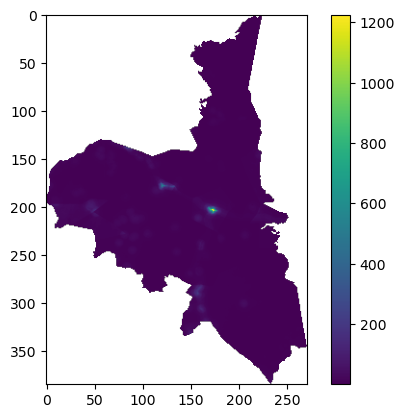

In [ ]:
tif_path = 'Datasets_Hackathon/Gridded_Population_Density_Data/Assaba_Pop_2010.tif'

with rasterio.open(tif_path) as src:
    data = src.read(1)
    crs = src.crs
    bounds = src.bounds
    nodata_value = src.nodata  # Get NoData value

data = np.where(data == nodata_value, np.nan, data)

plt.imshow(data, cmap='viridis')
plt.colorbar()
plt.show()    


In [17]:
print(crs)

EPSG:4326


In [8]:
import cv2

# Convert TIFF to Matrix using OpenCV
def convert_tif_with_opencv(tif_path):
    """Load TIFF file as a numerical matrix using OpenCV."""
    img = cv2.imread(tif_path, cv2.IMREAD_UNCHANGED)  # Load in original format

    # Convert TIFF using OpenCV
    tif_matrix_cv = np.where(img < -1e10, np.nan, img)
    
    return tif_matrix_cv


In [9]:
tif_matrix_cv = convert_tif_with_opencv(tif_path)


In [11]:
tif_matrix_cv

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]],
      shape=(385, 271), dtype=float32)

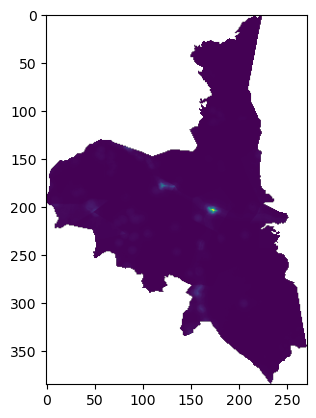

In [10]:
plt.imshow(tif_matrix_cv, cmap='viridis')